In [1]:
import json
import statistics
import matplotlib.pyplot as plt
import os

In [2]:
file_path_house = 'full_simplified_house.ndjson'
file_path_mona = 'full_simplified_The Mona Lisa.ndjson'
file_path_tornado = 'full_simplified_tornado.ndjson'
file_path_beard = 'full_simplified_beard.ndjson'
file_path_cookie = 'full_simplified_cookie.ndjson'
file_path_flower = 'full_simplified_flower.ndjson'
file_path_blackberry = 'full_simplified_blackberry.ndjson'
file_path_greatWall = 'full_simplified_The Great Wall of China.ndjson'
file_path_seesaw = 'full_simplified_see saw.ndjson'
file_path_soccerball = 'full_simplified_soccer ball.ndjson'
file_path_skyscraper = 'full_simplified_skyscraper.ndjson'
file_path_stitches = 'full_simplified_stitches.ndjson'
file_path_teapot = 'full_simplified_teapot.ndjson'
file_path_tooth = 'full_simplified_tooth.ndjson'
file_path_square = 'full_simplified_square.ndjson'
file_path_seaturtle = 'full_simplified_sea turtle.ndjson'
file_path_snowman = 'full_simplified_snowman.ndjson'
file_path_eiffelTower = 'full_simplified_The Eiffel Tower.ndjson'
file_path_stethoscope = 'full_simplified_stethoscope.ndjson'
file_path_rifle = 'full_simplified_rifle.ndjson'
file_path_fan = 'full_simplified_fan.ndjson'
print('files loaded')

files loaded


In [ ]:
def count_strokes_in_drawing(drawing):
    return len(drawing)

In [ ]:
def find_median_strokes_with_key_id(file_path):
    stroke_counts = []
    drawing_data_list = []

    with open(file_path, 'r') as file:
        for line in file:
            drawing_data = json.loads(line)
            stroke_count = count_strokes_in_drawing(drawing_data['drawing'])
            stroke_counts.append(stroke_count)
            drawing_data_list.append(drawing_data)

    median_strokes = statistics.median(stroke_counts)

    for drawing_data in drawing_data_list:
        if count_strokes_in_drawing(drawing_data['drawing']) == median_strokes:
            return median_strokes, drawing_data['key_id']

    return median_strokes, None

median_stroke_house, median_stroke_house_key_id = find_median_strokes_with_key_id(file_path_house)
median_stroke_mona, median_stroke_mona_key_id = find_median_strokes_with_key_id(file_path_mona)
median_stroke_tornado, median_stroke_tornado_key_id = find_median_strokes_with_key_id(file_path_tornado)
median_stroke_beard, median_stroke_beard_key_id = find_median_strokes_with_key_id(file_path_beard)

print('median stroke house:' + str(median_stroke_house))
print('median stroke house key id:' + str(median_stroke_house_key_id))
print('median stroke mona:' + str(median_stroke_mona))
print('median stroke mona key id:' + str(median_stroke_mona_key_id))
print('median stroke tornado:' + str(median_stroke_tornado))
print('median stroke tornado key id:' + str(median_stroke_tornado_key_id))
print('median stroke beard:' + str(median_stroke_beard))
print('median stroke beard key id:' + str(median_stroke_beard_key_id))


In [ ]:
def find_closest_to_mean_strokes_with_key_id(file_path):
    stroke_counts = []
    drawing_data_list = []

    with open(file_path, 'r') as file:
        for line in file:
            drawing_data = json.loads(line)
            stroke_count = count_strokes_in_drawing(drawing_data['drawing'])
            stroke_counts.append(stroke_count)
            drawing_data_list.append(drawing_data)

    mean_strokes = statistics.mean(stroke_counts)

    closest_strokes = None
    closest_strokes_key_id = None
    for drawing_data in drawing_data_list:
        if closest_strokes is None or abs(count_strokes_in_drawing(drawing_data['drawing']) - mean_strokes) < abs(closest_strokes - mean_strokes):
            closest_strokes = count_strokes_in_drawing(drawing_data['drawing'])
            closest_strokes_key_id = drawing_data['key_id']

    return mean_strokes, closest_strokes_key_id


mean_strokes_house, closest_strokes_key_id_house = find_closest_to_mean_strokes_with_key_id(file_path_house)
mean_strokes_mona, closest_strokes_key_id_mona = find_closest_to_mean_strokes_with_key_id(file_path_mona)
mean_strokes_tornado, closest_strokes_key_id_tornado = find_closest_to_mean_strokes_with_key_id(file_path_tornado)
mean_strokes_beard, closest_strokes_key_id_beard = find_closest_to_mean_strokes_with_key_id(file_path_beard)
mean_strokes_cookie, closest_strokes_key_id_cookie = find_closest_to_mean_strokes_with_key_id(file_path_cookie)

print('mean stroke house:' + str(mean_strokes_house))
print('key id house:' + str(closest_strokes_key_id_house))
print('mean stroke mona:' + str(mean_strokes_mona))
print('key id mona:' + str(closest_strokes_key_id_mona))
print('mean stroke tornado:' + str(mean_strokes_tornado))
print('key id tornado:' + str(closest_strokes_key_id_tornado))
print('mean stroke beard:' + str(mean_strokes_beard))
print('key id beard:' + str(closest_strokes_key_id_beard))
print('mean stroke cookie:' + str(mean_strokes_cookie))
print('key id cookie:' + str(closest_strokes_key_id_cookie))

In [ ]:
def plot_drawing(drawing, filename="drawing.png", folder="/documents/visuals/quickdraw_collab"):
    plt.figure(figsize=(3, 3))
    for stroke in drawing:
        plt.plot(stroke[0], [-y for y in stroke[1]], color='black')
    plt.axis('off')
    plt.savefig("fan.png", bbox_inches='tight', pad_inches=0)
    plt.show()

def find_and_plot_first_drawing_with_strokes(file_path, target_strokes):
    with open(file_path, 'r') as file:
        for line in file:
            drawing_data = json.loads(line)
            if len(drawing_data['drawing']) == target_strokes:
                plot_drawing(drawing_data['drawing'])
                print(drawing_data['key_id'])
                return drawing_data['key_id']
    return None

target_strokes = 10  

key_id_house = find_and_plot_first_drawing_with_strokes(file_path_house, target_strokes)
#key_id_mona = find_and_plot_first_drawing_with_strokes(file_path_mona, 22)
#key_id_tornado = find_and_plot_first_drawing_with_strokes(file_path_tornado, 23)
#key_id_beard = find_and_plot_first_drawing_with_strokes(file_path_beard, 30)
#key_id_cookie = find_and_plot_first_drawing_with_strokes(file_path_cookie, 70)
#key_id_flower = find_and_plot_first_drawing_with_strokes(file_path_flower, 30)
#key_id_blackberry = find_and_plot_first_drawing_with_strokes(file_path_blackberry, 40)
#key_id_greatWall = find_and_plot_first_drawing_with_strokes(file_path_greatWall, 45)
#key_id_seesaw = find_and_plot_first_drawing_with_strokes(file_path_seesaw, 25)
#key_id_soccerball = find_and_plot_first_drawing_with_strokes(file_path_soccerball, 24)
#key_id_skyscraper = find_and_plot_first_drawing_with_strokes(file_path_skyscraper, 3)
#key_id_stitches = find_and_plot_first_drawing_with_strokes(file_path_stitches, 10)
#key_id_teapot = find_and_plot_first_drawing_with_strokes(file_path_teapot, 16)
#key_id_tooth = find_and_plot_first_drawing_with_strokes(file_path_tooth, 15)
#key_id_square = find_and_plot_first_drawing_with_strokes(file_path_square, 2)
#key_id_seaturtle = find_and_plot_first_drawing_with_strokes(file_path_seaturtle, 9)
#key_id_snowman = find_and_plot_first_drawing_with_strokes(file_path_snowman, 6)
#key_id_eiffelTower = find_and_plot_first_drawing_with_strokes(file_path_eiffelTower, 27)
#key_id_stethoscope = find_and_plot_first_drawing_with_strokes(file_path_stethoscope, 10)
#key_id_rifle = find_and_plot_first_drawing_with_strokes(file_path_rifle, 5)
#key_id_fan = find_and_plot_first_drawing_with_strokes(file_path_fan, 10)

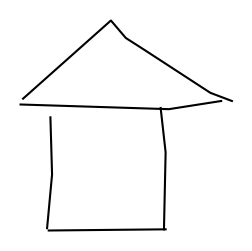

In [3]:
#finding key id from drawing position
import json
import matplotlib.pyplot as plt

def display_nth_drawing(file_path, n):
    try:
        with open(file_path, 'r') as file:
            for i, line in enumerate(file, start=1):
                if i == n:
                    row = json.loads(line)
                    drawing = row.get("drawing")
                    break
            else:
                print(f"No drawing found at entry {n}")
                return

        plt.figure(figsize=(3, 3))
        for stroke in drawing:
            plt.plot(stroke[0], [-y for y in stroke[1]], color='black') 
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing file: {e}")

# Example usage
#file_path = '  # Replace with your actual file path
nth_entry = 1417
display_nth_drawing(file_path_house, nth_entry)



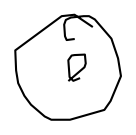

Drawing saved to /Users/vaishaliverma/Documents/visuals/QuickDraw Collab/flower_6294208107249664.png


In [33]:
def download_drawing(key_id, file_path, filename="drawing.png"):
    home_directory = os.path.expanduser('~') 
    save_path = os.path.join(home_directory, "Documents/visuals/QuickDraw Collab")

    if not os.path.exists(save_path):
        os.makedirs(save_path)
    filename = f"flower_{key_id}.png"
    full_file_path = os.path.join(save_path, filename)

    try:
        found = False
        with open(file_path, 'r') as file:
            for line in file:
                row = json.loads(line)
                if row.get("key_id") == key_id:
                    drawing = row.get("drawing")
                    found = True
                    break

        if not found:
            print("No drawing found for key_id:", key_id)
            return

        plt.figure(figsize=(1.5, 1.5))
        for stroke in drawing:
            plt.plot(stroke[0], [-y for y in stroke[1]], color='black')
        plt.axis('off')

        plt.savefig(full_file_path, bbox_inches='tight', pad_inches=0)
        plt.show()  # Close the plot

        print(f"Drawing saved to {full_file_path}")
    except Exception as e:
        print(f"Error processing file: {e}")

key_id_to_search = "6294208107249664"
download_drawing(key_id_to_search, file_path_flower)


In [35]:
import random

# Set a seed for reproducibility
random.seed(42)  # You can use any number as a seed

# Total number of items in the dataset
total_items = 345

# Desired sample size
sample_size = 10

# Generating a random sample
random_sample = random.sample(range(1, total_items + 1), sample_size)

print(random_sample)


[328, 58, 13, 141, 126, 115, 72, 53, 280, 45]


In [58]:
!pip install pycountry


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 5.3 MB/s eta 0:00:0000:0100:01m


In [95]:
import json
from collections import Counter
import pandas as pd
from functools import reduce
import pycountry

file_path_axe = 'full_simplified_axe.ndjson'
file_path_bread = 'full_simplified_bread.ndjson'
file_path_butterfly = 'full_simplified_butterfly.ndjson'
file_path_camel = 'full_simplified_camel.ndjson'
file_path_chair = 'full_simplified_chair.ndjson'
file_path_fence = 'full_simplified_fence.ndjson'
file_path_flying_saucer = 'full_simplified_flying saucer.ndjson'
file_path_hand = 'full_simplified_hand.ndjson'
file_path_spoon = 'full_simplified_spoon.ndjson'
file_path_zigzag = 'full_simplified_zigzag.ndjson'

country_freq = Counter()

def make_df(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)

            country = data.get('countrycode', 'Unknown')
            country_freq[country] += 1
    return pd.DataFrame(country_freq.items(), columns=['Country', 'Frequency'])

def country_name_from_code(code):
    country = pycountry.countries.get(alpha_2=code)
    return country.name if country else None


dataframes = [df_axe, df_bread, df_butterfly, df_camel, df_chair, df_fence, df_flying_saucer, df_hand, df_spoon, df_zigzag]
df_names = ['axe', 'bread', 'butterfly', 'camel', 'chair', 'fence', 'flying_saucer', 'hand', 'spoon', 'zigzag']

# Rename 'Frequency' column in each DataFrame to be unique
for df, name in zip(dataframes, df_names):
    df.rename(columns={'Frequency': f'Frequency_{name}'}, inplace=True)

# Use reduce to apply the merge operation across all DataFrames in the list
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Country', how='outer'), dataframes)
merged_df['Country'] = merged_df['Country'].apply(country_name_from_code)
merged_df['Total'] = merged_df.drop('Country', axis=1).sum(axis=1)

subset_df = merged_df[['Country', 'Total']]
pd.set_option('display.max_rows', None) 
#display(subset_df)
sorted_df = subset_df.sort_values(by='Total', ascending=False)
#sorted_df = sorted_df[sorted_df['Country'] != 'None']
sorted_df = sorted_df[sorted_df['Country'].notna()]
#display(sorted_df)

new_rows = pd.DataFrame({'Country': ['US1', 'US2', 'US3', 'US4'], 'Total': [883565, 883565, 883565, 883565]})
sorted_df1 = pd.concat([new_rows, sorted_df[1:]], ignore_index=True)
display(sorted_df1)

,Country,Total
0,US1,883565.0
1,US2,883565.0
2,US3,883565.0
3,US4,883565.0
4,United Kingdom,581436.0
5,Canada,286758.0
6,Germany,262794.0
7,Australia,185906.0
8,Russian Federation,174352.0
9,Brazil,152004.0


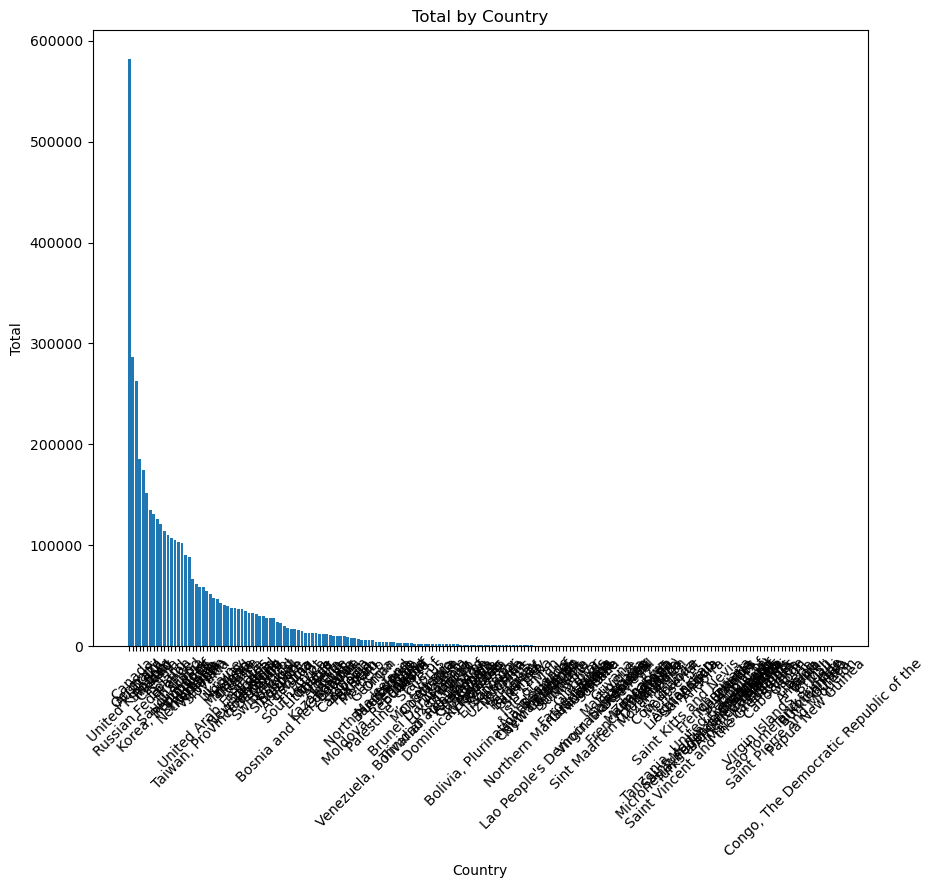

In [73]:
import matplotlib.pyplot as plt

# Assuming sorted_df has columns 'Country' and 'Total'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))  # You can adjust the size as needed

# Create a bar chart: 'Country' on the x-axis and 'Total' on the y-axis
ax.bar(sorted_df['Country'], sorted_df['Total'])

# Set labels and title (optional)
ax.set_xlabel('Country')
ax.set_ylabel('Total')
ax.set_title('Total by Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


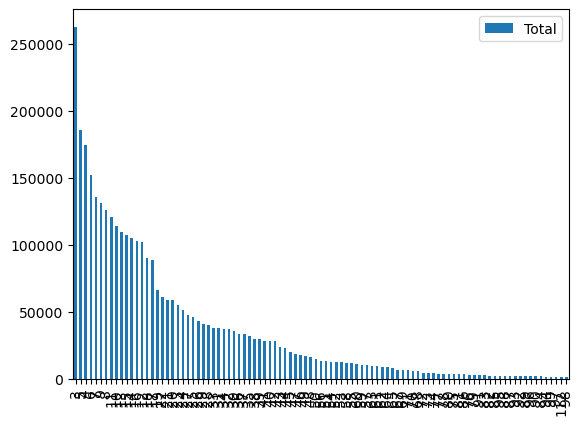

In [78]:
sorted_df[3:100].plot(kind='bar')
plt.show()

In [ ]:
## classifier building